# cerebellum
## sub001_sess1

In [1]:
import nighres
import os

skip_plots = False
try:
    from nilearn import plotting
except ImportError:
    skip_plots = True
    print('Nilearn could not be imported, plotting will be skipped')


in_dir = os.path.join(os.getcwd()[:-8], 'nighres_examples/tissue_classification')
out_dir = os.path.join(os.getcwd()[:-8], 'nighres_examples/cortical_depth_estimation')

segmentation = os.path.join(in_dir, 'sub001_sess1_mgdm-seg.nii.gz')
boundary_dist = os.path.join(in_dir, 'sub001_sess1_mgdm-dist.nii.gz')
max_labels = os.path.join(in_dir, 'sub001_sess1_mgdm-lbls.nii.gz')
max_probas = os.path.join(in_dir, 'sub001_sess1_mgdm-mems.nii.gz')

### Region Extraction

In [2]:
cortex = nighres.brain.extract_brain_region(segmentation=segmentation,
                                            levelset_boundary=boundary_dist,
                                            maximum_membership=max_probas,
                                            maximum_label=max_labels,
                                            extracted_region='cerebellum',
                                            save_data=True,
                                            file_name='sub001_sess1_cerebellum',
                                            output_dir=out_dir)


Extract Brain Region

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
skip computation (use existing results)


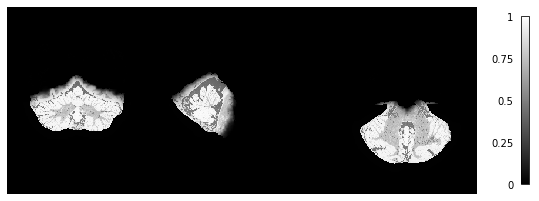

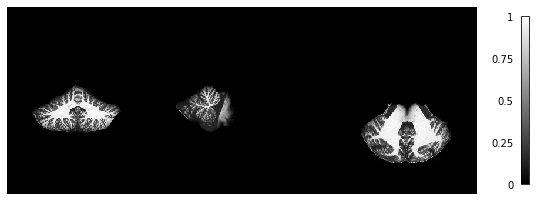

In [3]:
if not skip_plots:
    plotting.plot_img(cortex['region_proba'],
        vmin=0, vmax=1, cmap='gray', colorbar=True,
        annotate=False, draw_cross=False)
    plotting.plot_img(cortex['inside_proba'],
        vmin=0, vmax=1, cmap='gray', colorbar=True,
        annotate=False, draw_cross=False)

### CRUISE

In [4]:
cruise = nighres.cortex.cruise_cortex_extraction(
                        init_image=cortex['inside_mask'],
                        wm_image=cortex['inside_proba'],
                        gm_image=cortex['region_proba'],
                        csf_image=cortex['background_proba'],
                        normalize_probabilities=True,
                        save_data=True,
                        file_name="sub001_sess1_cerebellum",
                        output_dir=out_dir)


CRUISE Cortical Extraction

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
skip computation (use existing results)


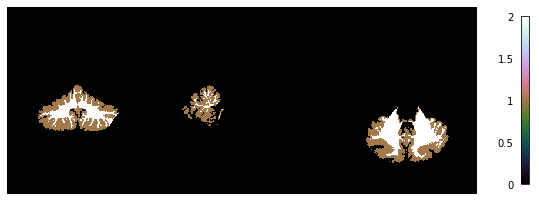

In [5]:
if not skip_plots:
    plotting.plot_img(cruise['cortex'],
                      vmin=0, vmax=2, cmap='cubehelix',  colorbar=True,
                      annotate=False,  draw_cross=False)

### Volumetric layering

In [6]:
depth = nighres.laminar.volumetric_layering(
                        inner_levelset=cruise['gwb'],
                        outer_levelset=cruise['cgb'],
                        n_layers=4,
                        save_data=True,
                        file_name="sub001_sess1_cerebellum",
                        output_dir=out_dir)


Volumetric Layering

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
skip computation (use existing results)


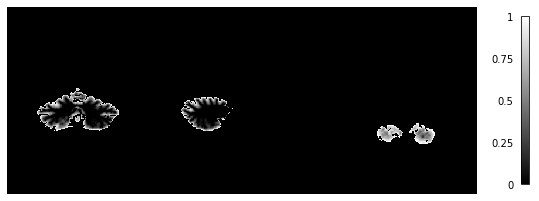

In [7]:
if not skip_plots:
    plotting.plot_img(depth['depth'],
                      vmin=0, vmax=1, cmap='gray',  colorbar=True,
                      annotate=False,  draw_cross=False)

## sub002_sess1

In [8]:
segmentation = os.path.join(in_dir, 'sub002_sess1_mgdm-seg.nii.gz')
boundary_dist = os.path.join(in_dir, 'sub002_sess1_mgdm-dist.nii.gz')
max_labels = os.path.join(in_dir, 'sub002_sess1_mgdm-lbls.nii.gz')
max_probas = os.path.join(in_dir, 'sub002_sess1_mgdm-mems.nii.gz')
cortex2 = nighres.brain.extract_brain_region(segmentation=segmentation,
                                            levelset_boundary=boundary_dist,
                                            maximum_membership=max_probas,
                                            maximum_label=max_labels,
                                            extracted_region='cerebellum',
                                            save_data=True,
                                            file_name='sub002_sess1_cerebellum',
                                            output_dir=out_dir)


Extract Brain Region

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
skip computation (use existing results)


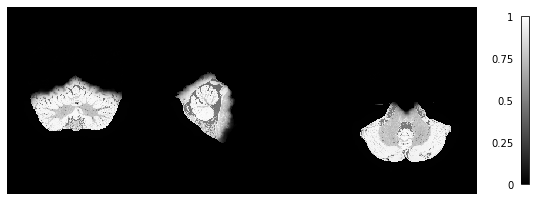

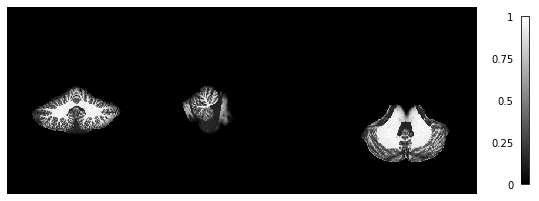

In [9]:
if not skip_plots:
    plotting.plot_img(cortex2['region_proba'],
        vmin=0, vmax=1, cmap='gray', colorbar=True,
        annotate=False, draw_cross=False)
    plotting.plot_img(cortex2['inside_proba'],
        vmin=0, vmax=1, cmap='gray', colorbar=True,
        annotate=False, draw_cross=False)

In [10]:
cruise2 = nighres.cortex.cruise_cortex_extraction(
                        init_image=cortex2['inside_mask'],
                        wm_image=cortex2['inside_proba'],
                        gm_image=cortex2['region_proba'],
                        csf_image=cortex2['background_proba'],
                        normalize_probabilities=True,
                        save_data=True,
                        file_name="sub002_sess1_cerebellum",
                        output_dir=out_dir)


CRUISE Cortical Extraction

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
skip computation (use existing results)


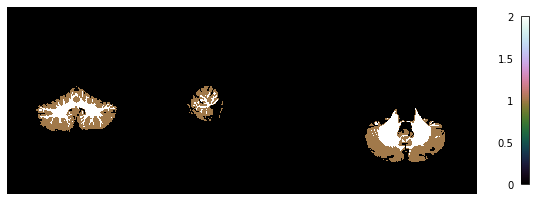

In [11]:
if not skip_plots:
    plotting.plot_img(cruise2['cortex'],
                      vmin=0, vmax=2, cmap='cubehelix',  colorbar=True,
                      annotate=False,  draw_cross=False)

In [12]:
depth2 = nighres.laminar.volumetric_layering(
                        inner_levelset=cruise2['gwb'],
                        outer_levelset=cruise2['cgb'],
                        n_layers=4,
                        save_data=True,
                        file_name="sub002_sess1_cerebellum",
                        output_dir=out_dir)


Volumetric Layering

Outputs will be saved to /home/cons/python/nighres_examples/cortical_depth_estimation/
skip computation (use existing results)


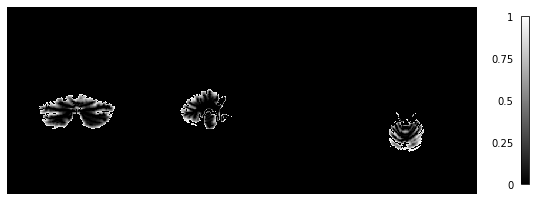

In [13]:
if not skip_plots:
    plotting.plot_img(depth2['depth'],
                      vmin=0, vmax=1, cmap='gray',  colorbar=True,
                      annotate=False,  draw_cross=False)